# Phys 427 Lab 5.2

### *Jeff Capoeman*

### 13 February 2020

In [31]:
import numpy as np
import matplotlib.pyplot as plot
import uproot
import pandas
import awkward

### From what I understand about lorentz 4 vectors and invariant mass, is that lorentz 4 vectors are a physical vector with 4 components whos product is invariant under reference frame. The most common case you will find of 4 vectors when you look for them on the internet, is the lorentz 4 vector for relativity, where x, y , and z are the usual 3 dimensisonal components, and time is the 4th component of the vector. In the case of invariant mass, mass is the 4th component, and the product of our lorentz 4 vecor is invariant with respect to different reference frames. Our 4th mass component, is invarient in it's own reference frame in other words, so it's mass in it's own reference frame is conserved.

### In the following report, you can download the data I used, similar to 5.1 of my report, using the following link

###  https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root

In [17]:
data1 = uproot.open("nLep.root") #I renamed the root file so I wouldn't have to type out the whole thing
data1.keys() #found the branch that the data was in

[b'mini;1']

In [18]:
data1 = data1["mini"] # called the branch from the tree

data1 = data1.pandas.df(flatten = False)

In [20]:
data1.keys()

Index(['runNumber', 'eventNumber', 'channelNumber', 'mcWeight',
       'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON',
       'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG',
       'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM',
       'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt',
       'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type',
       'lep_isTightID', 'lep_ptcone30', 'lep_etcone20',
       'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et',
       'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt',
       'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n',
       'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta',
       'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30',
       'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta',
       'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched',
       '

In [68]:
p = data1["lep_pt"] #extracts lepton momentum
E = data1["lep_E"] #extracts lepton energy
c = 3*(10**8)

### Above I have extracted the leptons momentum and energy, because this is what we need to calculate the Z bosons invariant mass. The invariant mass can be found as a function of 
### $$ m_0 = \sqrt{(\frac{E}{c^2})^2 + (\frac{p}{c})^2} $$
### Leptons are what the boson decays into, and in the rest frame of the particle, energy and mass are conserved so we can extract the total energy of the system to find the origin mass.

In [69]:
p = awkward.fromiter(p)
E = awkward.fromiter(E)

# creates awkward arrays

p = p.sum()
E = E.sum()

# similar to adding the energies and momentum of each particle

x = (E/c**2)**2
y = (p/c)**2

# operates on each component of our arrays

rootvar = x + y
rootvar = rootvar.tolist()

m_0 = np.sqrt(rootvar)

Text(0.5, 0, 'Boson Mass')

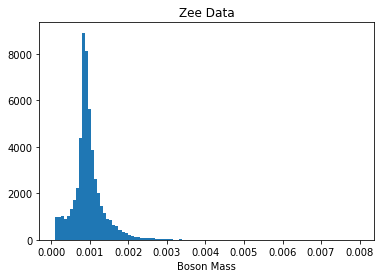

In [75]:
plot.figure()
plot.hist(m_0, bins = 100)
plot.title('Zee Data')
plot.xlabel('Boson Mass')

In [87]:
data2 = uproot.open("DataLab5.root") #I renamed the root file so I wouldn't have to type out the whole thing
data2.keys()

[b'mini;1']

In [88]:
data2 = data2["mini"] # called the branch from the tree
data2 = data2.pandas.df(flatten = False)

p2 = data2["lep_pt"]
E2 = data2["lep_E"]

#extracted necessary data

p2 = awkward.fromiter(p2)
E2 = awkward.fromiter(E2)
# creates awkward arrays

In [90]:
p2 = p2.sum()
E2 = E2.sum()

# similar to adding the energies and momentum of each particle

x = (E2/c**2)**2
y = (p2/c)**2

# operates on each component of our arrays

rootvar = x + y
rootvar = rootvar.tolist()

m_02 = np.sqrt(rootvar)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.25632333, -0.20632333, -0.15632333, -0.10632333, -0.05632333,
        -0.00632333,  0.04367667,  0.09367667,  0.14367667,  0.19367667,
         0.24367667,  0.29367667,  0.34367667,  0.39367667,  0.44367667,
         0.49367667,  0.54367667,  0.59367667,  0.64367667,  0.69367667,
         0.74367667]),
 <a list of 20 Patch objects>)

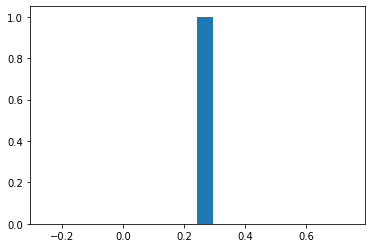

In [93]:
plot.figure()
plot.hist(m_02, bins = 20)